In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import happybase as hb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_hbase(table_name):
    con  = hb.Connection('localhost')
    table = con.table(table_name)
    rows = table.scan()
    data = [{k.decode().split(' ')[-1]: v.decode() for k, v in r[1].items()} for r in rows]
    con.close()
    df = pd.DataFrame(data)
    return df

In [4]:
df_crashes = load_hbase(b'traffic_crashes')
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   conditions:alignment                    1000 non-null   object
 1   conditions:posted_speed_limit           1000 non-null   object
 2   conditions:road_deffect                 1000 non-null   object
 3   conditions:roadway_surface_cond         1000 non-null   object
 4   conditions:weather_condition            1000 non-null   object
 5   crash_info:crash_type                   1000 non-null   object
 6   crash_info:damage                       1000 non-null   object
 7   crash_info:first_crash_type             1000 non-null   object
 8   crash_info:num_units                    1000 non-null   object
 9   crash_info:prim_contributory_cause      1000 non-null   object
 10  crash_info:sec_contributory_cause       1000 non-null   object
 11  id:li

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


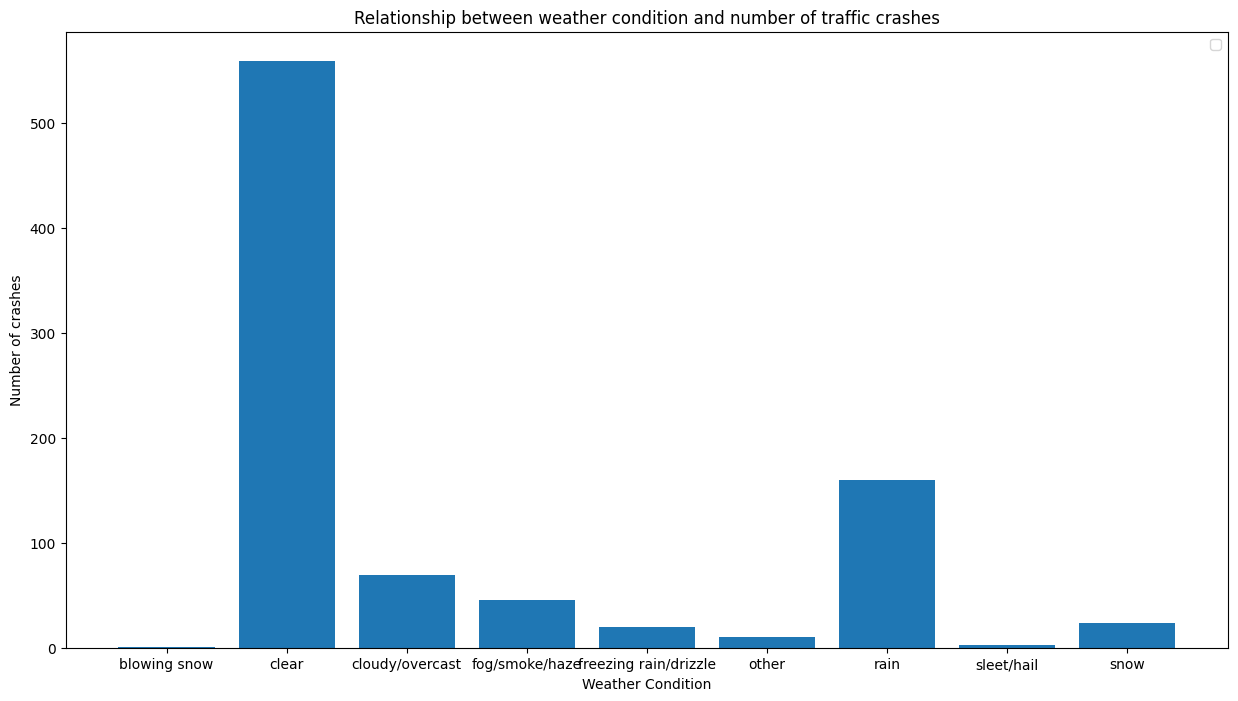

In [8]:
df_weather = df_crashes.groupby(["conditions:weather_condition"], as_index=False).count()
df_weather["conditions:weather_condition"] = df_weather["conditions:weather_condition"].str.lower()

df_weather = df_weather[(df_weather["conditions:weather_condition"] != "unknown")]

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(df_weather["conditions:weather_condition"], df_weather["conditions:alignment"])
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Weather Condition')
ax.set_title("Relationship between weather condition and number of traffic crashes")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


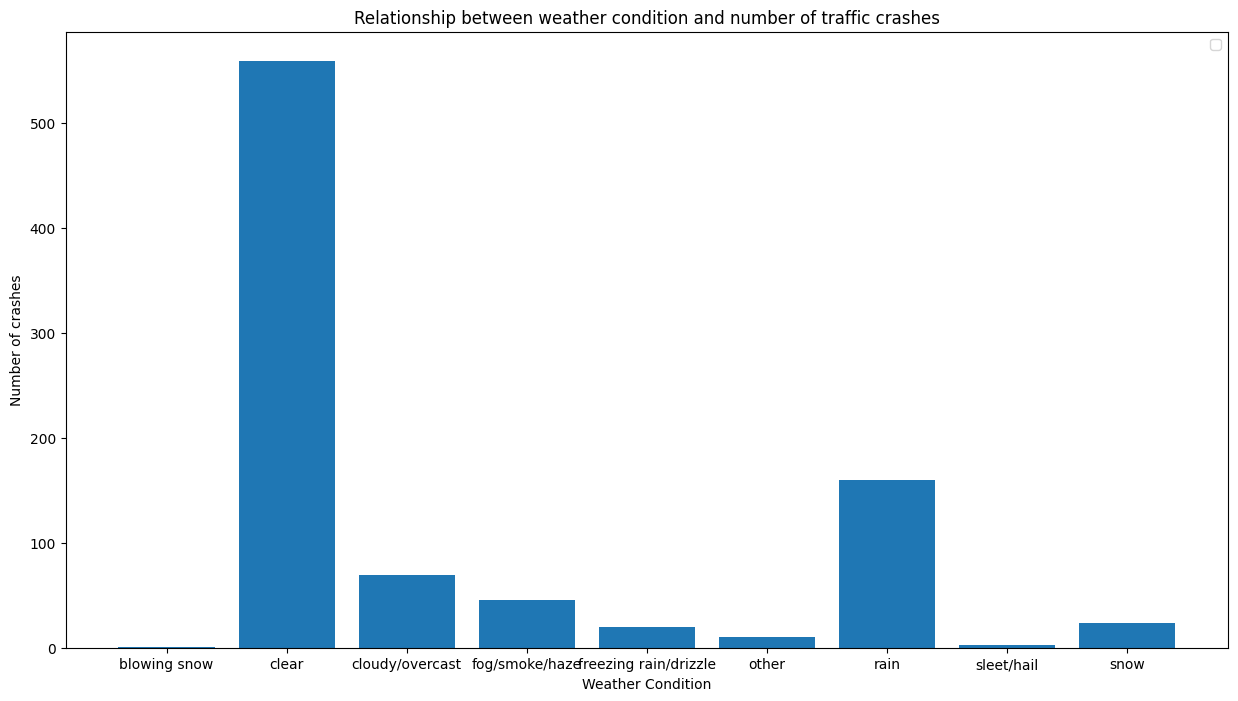

In [10]:
df_weather = df_crashes.groupby(["conditions:weather_condition"], as_index=False).count()
df_weather["conditions:weather_condition"] = df_weather["conditions:weather_condition"].str.lower()

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(df_weather["conditions:weather_condition"], df_weather["conditions:alignment"])
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Weather Condition')
ax.set_title("Relationship between weather condition and number of traffic crashes")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


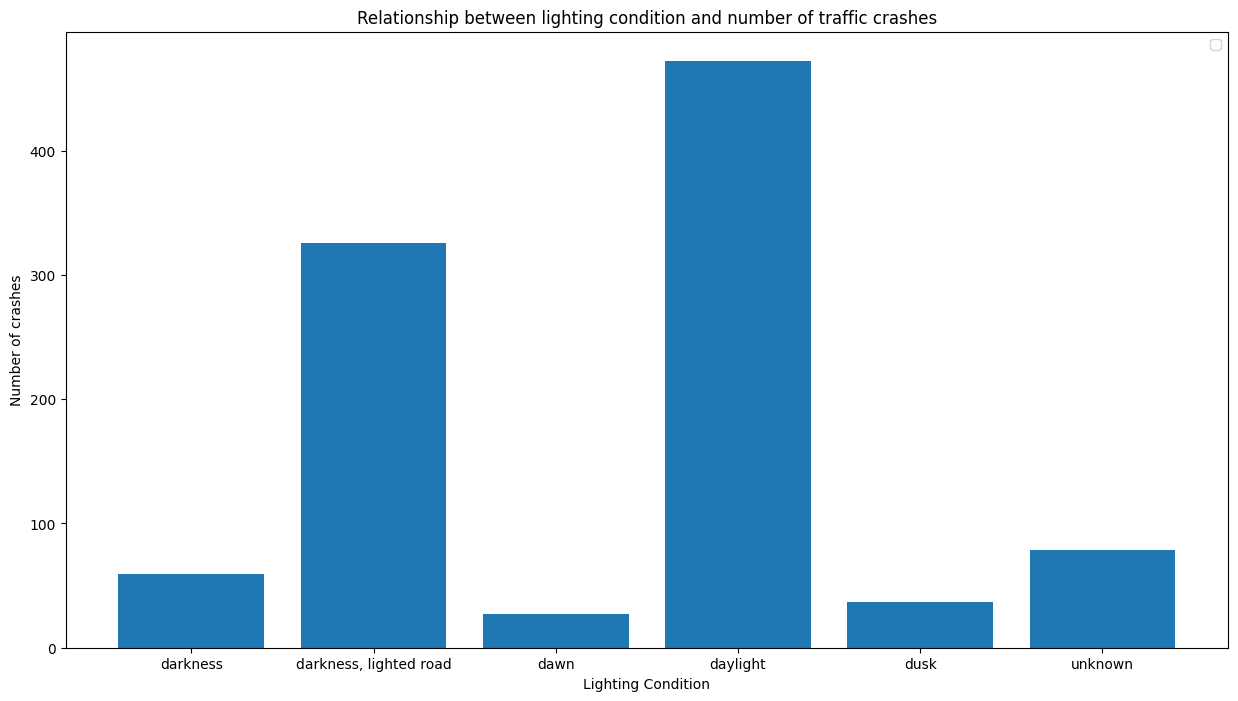

In [8]:
df_lighting = df_crashes.groupby(["id:lighting_condiction"], as_index=False)["conditions:alignment"].count()
df_lighting["id:lighting_condiction"] = df_lighting["id:lighting_condiction"].str.lower()

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(df_lighting["id:lighting_condiction"], df_lighting["conditions:alignment"])
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Lighting Condition')
ax.set_title("Relationship between lighting condition and number of traffic crashes")
ax.legend()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


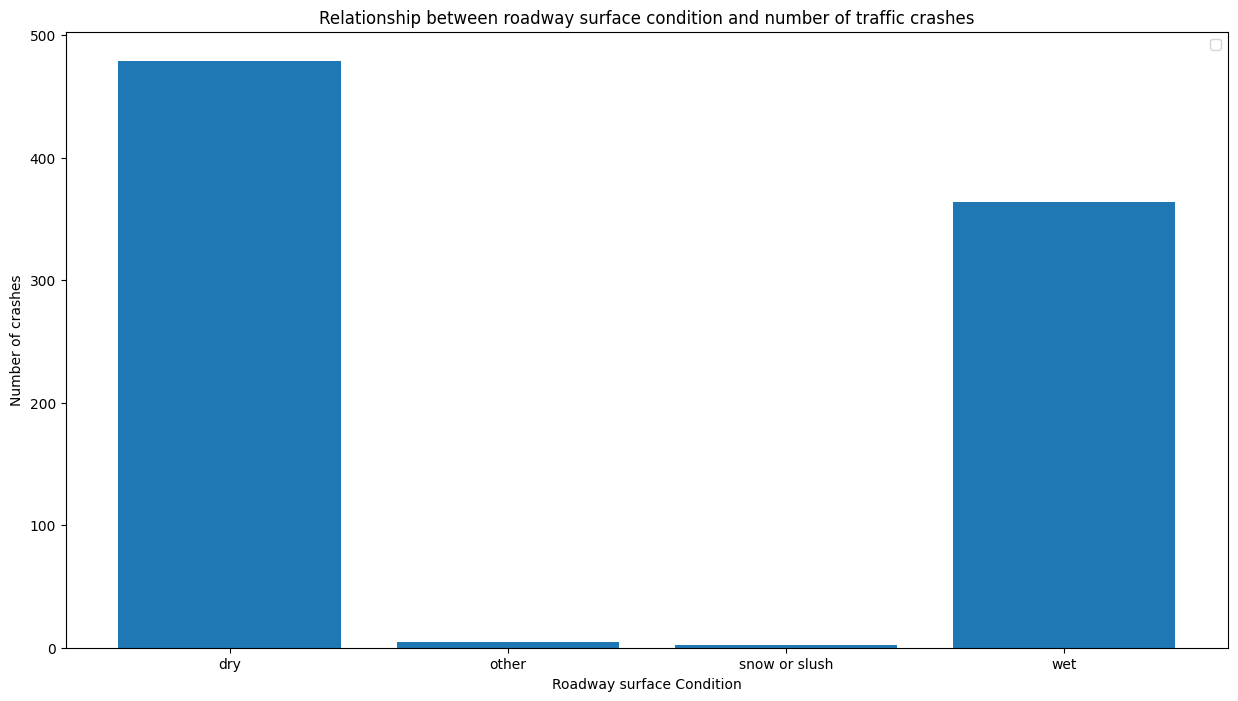

In [12]:
df_roadway = df_crashes.groupby(["conditions:roadway_surface_cond"], as_index=False).count()
df_roadway["conditions:roadway_surface_cond"] = df_roadway["conditions:roadway_surface_cond"].str.lower()

df_roadway = df_roadway[(df_roadway["conditions:roadway_surface_cond"] != "unknown")]

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(df_roadway["conditions:roadway_surface_cond"], df_roadway["conditions:alignment"])
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Roadway surface Condition')
ax.set_title("Relationship between roadway surface condition and number of traffic crashes")
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


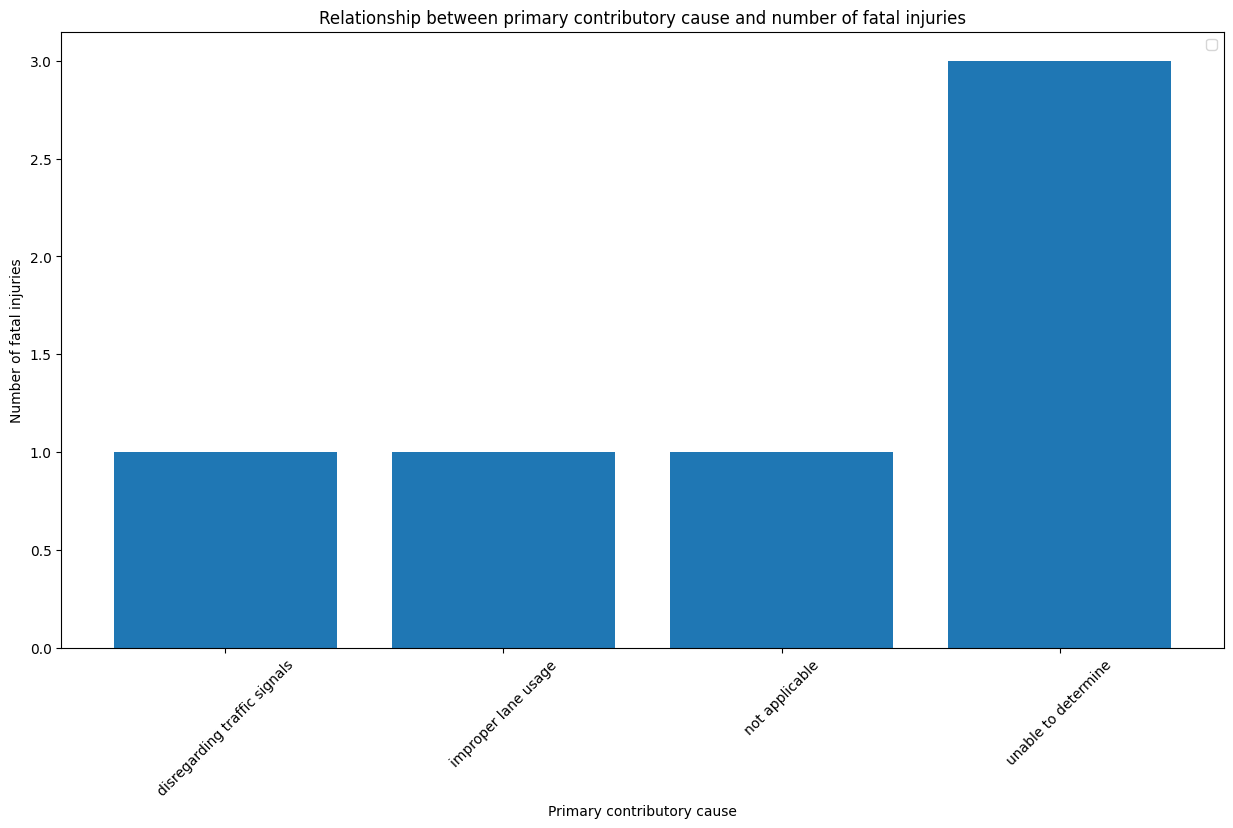

In [95]:
df_death = df_crashes.groupby(["crash_info:prim_contributory_cause"], as_index=False)["injuries:injuries_fatal"].sum()
df_death["crash_info:prim_contributory_cause"] = df_death["crash_info:prim_contributory_cause"].str.lower()
#df[df.val > 0.5]
df_death = df_death[df_death["injuries:injuries_fatal"] >0]

fig, ax = plt.subplots(1,1, figsize=(15, 8))
plt.xticks(rotation = 45)
ax.bar(df_death["crash_info:prim_contributory_cause"], df_death["injuries:injuries_fatal"])
ax.set_ylabel('Number of fatal injuries')
ax.set_xlabel('Primary contributory cause')
ax.set_title("Relationship between primary contributory cause and number of fatal injuries")
ax.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


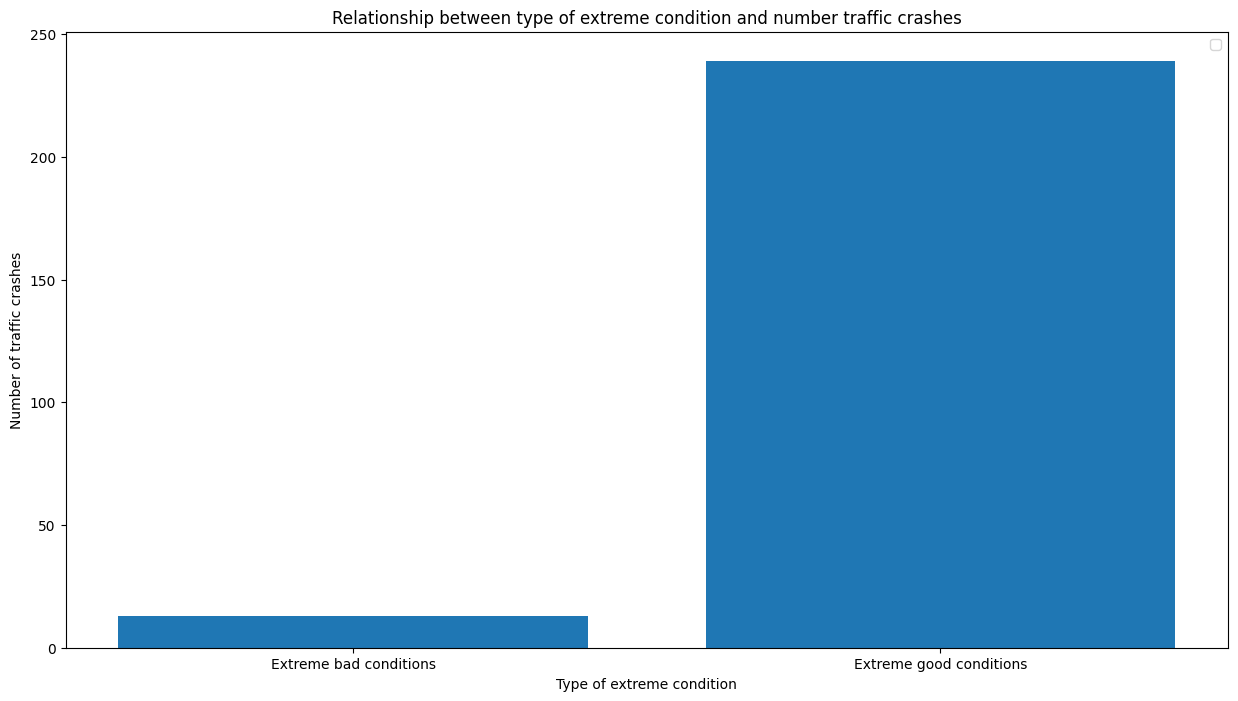

In [9]:
#skrajne warunki
# select count(crash_record_is) as number_of_crashes,
# into extreme_bad_conidtions
# from traffic_crashes
# where (lighting_conditions == 'DARKNESS') and 
# (roadwat_surface_cond == 'WET') and
# (weather_condition != 'UNKNOWN') and (weather_condition != 'CLEAR')

# %skrajnie dobre warunki
# select count(crash_record_is) as number_of_crashes,
# into extreme_good_conidtions
# from traffic_crashes
# where (lighting_conditions == 'DAYLIGHT') and 
# (roadwat_surface_cond == 'DRY') and
# (weather_condition == 'CLEAR')


df_bad = df_crashes[(df_crashes["id:lighting_condiction"] == 'DARKNESS') & (df_crashes["conditions:roadway_surface_cond"] == 'WET') &
                   (df_crashes["conditions:weather_condition"] != 'UNKNOWN') & (df_crashes["conditions:weather_condition"] != 'CLEAR')]
bad_crashes = len(df_bad.index)

df_good = df_crashes[(df_crashes["id:lighting_condiction"] == 'DAYLIGHT') &(df_crashes["conditions:roadway_surface_cond"] == 'DRY') &
                 (df_crashes["conditions:weather_condition"]== 'CLEAR')]
good_crashes = len(df_good.index)
names = ["Extreme bad conditions", "Extreme good conditions"]

fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(names, [bad_crashes, good_crashes])
ax.set_ylabel('Number of traffic crashes')
ax.set_xlabel('Type of extreme condition')
ax.set_title("Relationship between type of extreme condition and number traffic crashes")
ax.legend()
plt.show()